1. Template Matching

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

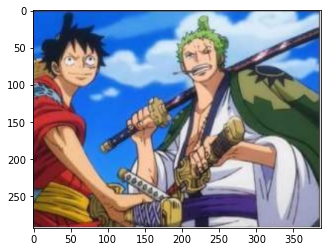

In [16]:
image = cv2.imread('data/onepiece1.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

1.1 Template gambar

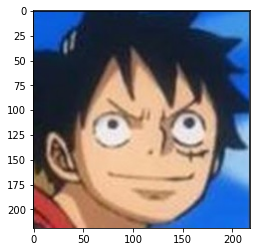

In [17]:
face = cv2.imread('data/face_luffy1.jpg')
face = cv2.cvtColor(face, cv2.COLOR_BGR2RGB)
plt.imshow(face)

In [18]:
height, width, channels = face.shape
print(f'height face : {height} dan width face : {width}')

height face : 219 dan width face : 218


1.2 Metode Perbandingan List

In [19]:
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR', 'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

In [20]:
def templateMatching(image, face, methods):
    resData = []
    result = []

    for i in methods:
        full_copy = image.copy()
        method = eval(i)
        res = cv2.matchTemplate(full_copy, face, method)
        resData.append(res)
        min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

        if method in  [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
            top_left = min_loc
        else:
            top_left = max_loc

        bottom_right = (top_left[0] + width, top_left[1] + height)

        cv2.rectangle(full_copy, top_left, bottom_right, 255, 10)
        result.append(full_copy)

        plt.subplot(121)
        plt.imshow(res)
        plt.title('Result of Template Matching')
        
        plt.subplot(122)
        plt.imshow(full_copy)
        plt.title('Detected Point')

        plt.suptitle(i)

        plt.show()
        print('\n')

    return [resData, result]

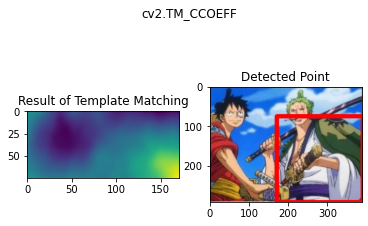

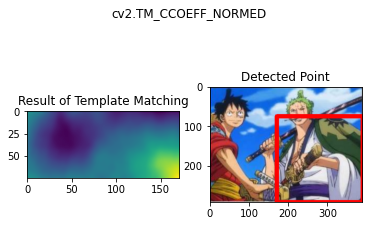

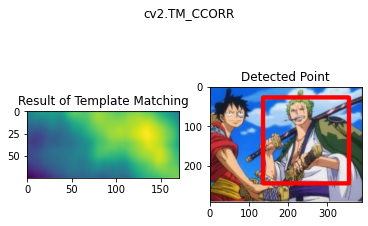

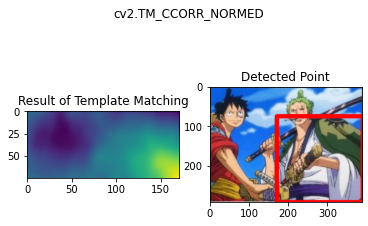

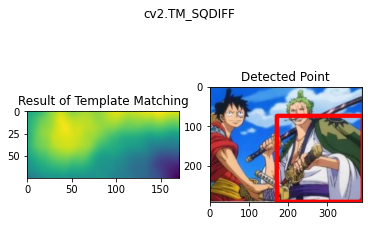

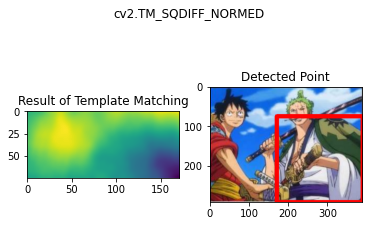



jenis data : <class 'list'>, ukuran data : 6
[array([[ 5.76083480e+07,  5.30411400e+07,  5.05094960e+07, ...,
        -1.08368752e+08, -1.10450104e+08, -1.16646440e+08],
       [ 4.06635360e+07,  3.60982360e+07,  3.35370760e+07, ...,
        -1.18139208e+08, -1.20408384e+08, -1.26768344e+08],
       [ 4.35610480e+07,  3.89857080e+07,  3.63660680e+07, ...,
        -1.06084224e+08, -1.08565376e+08, -1.15128664e+08],
       ...,
       [ 3.66185080e+07,  3.41930840e+07,  3.30795460e+07, ...,
         1.92148560e+08,  1.92859232e+08,  1.89878688e+08],
       [ 3.85218440e+07,  3.62020280e+07,  3.52276160e+07, ...,
         1.94827904e+08,  1.95709920e+08,  1.92939776e+08],
       [ 4.07321800e+07,  3.84928640e+07,  3.76290000e+07, ...,
         1.97720000e+08,  1.98710000e+08,  1.96112544e+08]], dtype=float32), array([[ 0.07538503,  0.06942771,  0.06607378, ..., -0.14253625,
        -0.14549516, -0.1530367 ],
       [ 0.05313415,  0.04718187,  0.04380744, ..., -0.15519428,
        -0.158

In [21]:
resData, result = templateMatching(image, face, methods)
print(f'jenis data : {type(resData)}, ukuran data : {len(resData)}')
print(resData)

1.3. Menggunakan Data Template yang berbeda

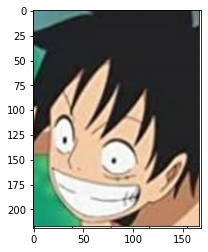

In [27]:
face2 = cv2.imread('data/face_luffy2.jpg')
face2 = cv2.cvtColor(face2, cv2.COLOR_BGR2RGB)
plt.imshow(face2)

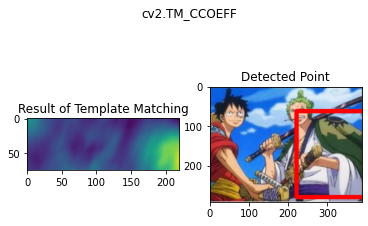

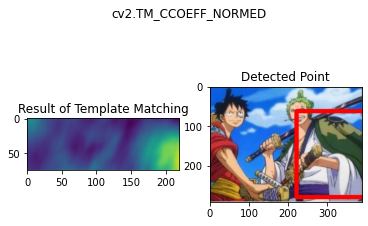

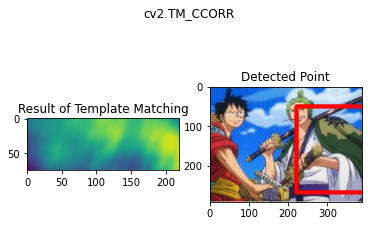

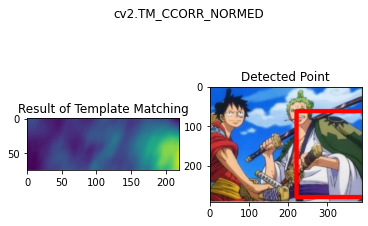

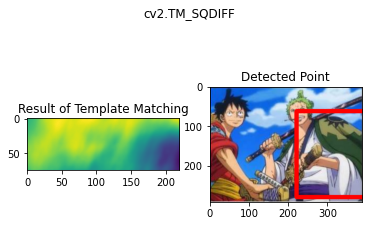

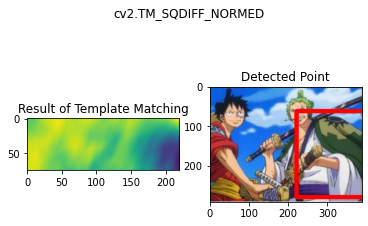



jenis data : <class 'list'>, ukuran data : 6
[array([[ 4.0472032e+07,  3.8173580e+07,  3.6834448e+07, ...,
        -1.1203972e+08, -1.0974940e+08, -9.6942496e+07],
       [ 4.0849360e+07,  3.8628256e+07,  3.7494600e+07, ...,
        -1.0616523e+08, -1.0404638e+08, -9.1386680e+07],
       [ 3.8631524e+07,  3.6513940e+07,  3.5635976e+07, ...,
        -1.0192514e+08, -9.9946168e+07, -8.7397344e+07],
       ...,
       [-6.2336164e+07, -6.3471840e+07, -6.3972544e+07, ...,
         1.4937624e+08,  1.5563032e+08,  1.7187344e+08],
       [-6.2086704e+07, -6.3052876e+07, -6.3430748e+07, ...,
         1.4665445e+08,  1.5281010e+08,  1.6901056e+08],
       [-4.8602140e+07, -4.9455532e+07, -4.9789296e+07, ...,
         1.5514699e+08,  1.6129362e+08,  1.7741573e+08]], dtype=float32), array([[ 0.06215937,  0.05866981,  0.05659284, ..., -0.17310488,
        -0.16982363, -0.14917023],
       [ 0.06264407,  0.05927812,  0.05751859, ..., -0.16380315,
        -0.1607772 , -0.14042917],
       [ 0.0592

In [28]:
resData, result = templateMatching(image, face2, methods)
print(f'jenis data : {type(resData)}, ukuran data : {len(resData)}')
print(resData)

2. Brute Fore Detection

2.1. Persiapan Sample Data

In [22]:
def display(img, cmap='gray'):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap='gray')

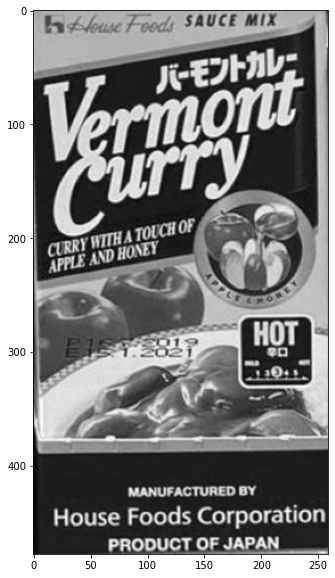

In [23]:
obj = cv2.imread('data/object1.png', 0)
display(obj)

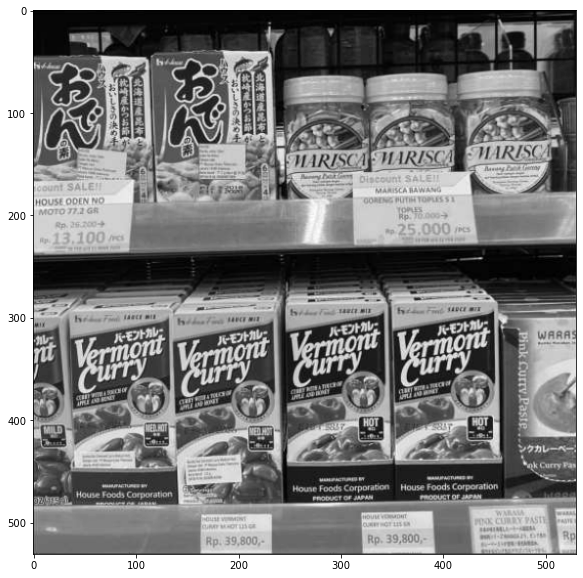

In [24]:
host = cv2.imread('data/swalayan1.png',0)
display(host)

2.2. Menggunakan ORB Descriptors

keypoint object : <class 'tuple'>, 499, deskripsi object : (499, 32)
keypoint object : <class 'tuple'>, 500, deskripsi object : (500, 32)


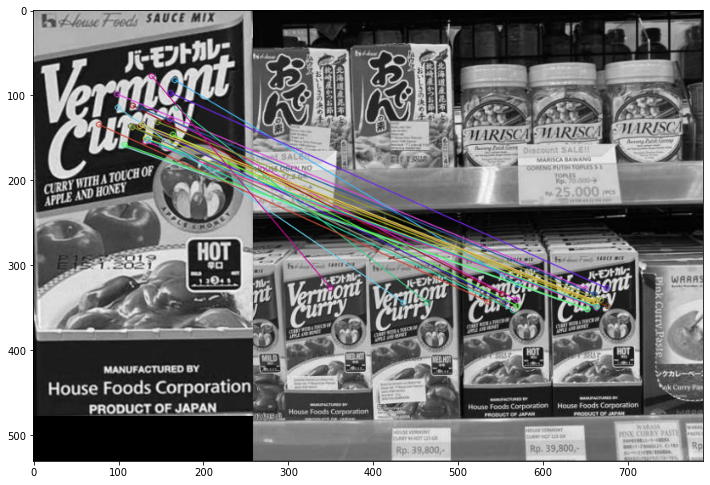

In [25]:
orb = cv2.ORB_create()

kp1, des1 = orb.detectAndCompute(obj, None)
kp2, des2 = orb.detectAndCompute(host, None)

print(f'keypoint object : {type(kp1)}, {len(kp1)}, deskripsi object : {des1.shape}')
print(f'keypoint object : {type(kp2)}, {len(kp2)}, deskripsi object : {des2.shape}')

bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

matches = bf.match(des1, des2)

matches = sorted(matches, key = lambda x:x.distance)
obj_matches = cv2.drawMatches(obj, kp1, host, kp2, matches[:25], None, flags=2)

display(obj_matches)

2.3. Menggunakan SIFT Descriptors dan Ratio Test

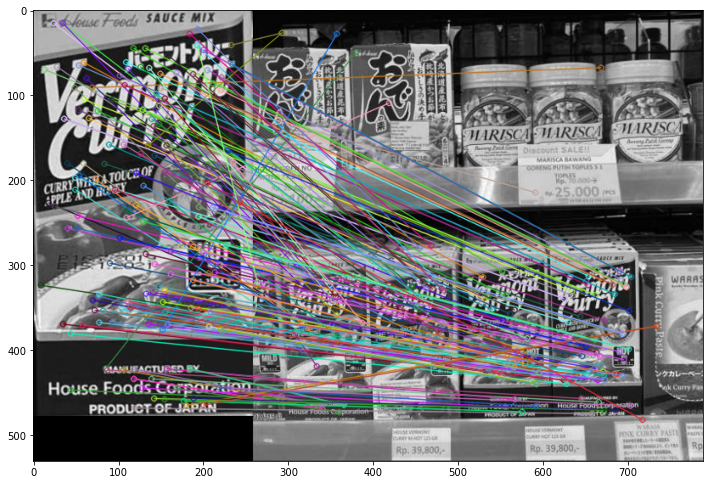

In [26]:
sift = cv2.xfeatures2d.SIFT_create()

kp1, des1 = sift.detectAndCompute(obj, None)
kp2, des2 = sift.detectAndCompute(host, None)

bf = cv2.BFMatcher()

matches = bf.knnMatch(des1, des2, k=2)

good = []

for match1, match2 in matches:
    if match1.distance < 0.75*match2.distance:
        good.append([match1])

sift_matches = cv2.drawMatchesKnn(obj,kp1,host,kp2,good,None,flags=2)

display(sift_matches)